In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib as mpl

# Scraping the Data From Understat

In [2]:
#Scraping All of Mane's shots:
base_url = 'https://understat.com/player/'
player = str(input('Please enter the player id: '))
url = base_url+player

Please enter the player id:  838


In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [4]:
#Getting the shot data:
strings = scripts[3].string

In [5]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

data[:5]

[{'id': '15835',
  'minute': '33',
  'result': 'SavedShot',
  'X': '0.7930000305175782',
  'Y': '0.38799999237060545',
  'xG': '0.03144051134586334',
  'player': 'Sadio Mané',
  'h_a': 'h',
  'player_id': '838',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '4741',
  'h_team': 'Southampton',
  'a_team': 'Queens Park Rangers',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2014-09-27 15:00:00',
  'player_assisted': None,
  'lastAction': 'None'},
 {'id': '15841',
  'minute': '52',
  'result': 'SavedShot',
  'X': '0.8159999847412109',
  'Y': '0.69',
  'xG': '0.0295916348695755',
  'player': 'Sadio Mané',
  'h_a': 'h',
  'player_id': '838',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4741',
  'h_team': 'Southampton',
  'a_team': 'Queens Park Rangers',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2014-09-27 15:00:00',
  'player_assisted': 'Morgan Schneiderlin',
  'lastAction': 'Pass'},
 {'id': '15845',
 

In [6]:
df = pd.DataFrame(data)

df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,15835,33,SavedShot,0.7930000305175782,0.38799999237060545,0.03144051134586334,Sadio Mané,h,838,OpenPlay,2014,LeftFoot,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,None,None
1,15841,52,SavedShot,0.8159999847412109,0.69,0.0295916348695755,Sadio Mané,h,838,OpenPlay,2014,RightFoot,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,Morgan Schneiderlin,Pass
2,15845,56,BlockedShot,0.9359999847412109,0.39799999237060546,0.045642297714948654,Sadio Mané,h,838,FromCorner,2014,Head,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,Steven Davis,Cross
3,17618,8,BlockedShot,0.9430000305175781,0.6,0.31141433119773865,Sadio Mané,a,838,OpenPlay,2014,RightFoot,4696,Tottenham,Southampton,1,0,2014-10-05 14:05:00,Graziano Pellè,Cross
4,17627,53,BlockedShot,0.7169999694824218,0.46299999237060546,0.04444437101483345,Sadio Mané,a,838,DirectFreekick,2014,RightFoot,4696,Tottenham,Southampton,1,0,2014-10-05 14:05:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,417053,26,BlockedShot,0.8859999847412109,0.40099998474121096,0.11514994502067566,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,Pass
517,417054,28,BlockedShot,0.8959999847412109,0.5220000076293946,0.1277635395526886,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,BallRecovery
518,417059,43,MissedShots,0.9209999847412109,0.49599998474121093,0.13614791631698608,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Trent Alexander-Arnold,Cross
519,417060,46,MissedShots,0.9540000152587891,0.5359999847412109,0.15364333987236023,Sadio Mané,h,838,OpenPlay,2020,Head,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Andrew Robertson,Cross


In [7]:
filt = ((df['h_team'] == 'Liverpool') | (df['a_team'] == 'Liverpool')) 

# Filtering all the shots taken when playing for Liverpool

In [9]:
df1 = df[filt]

df1

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
37,24199,59,BlockedShot,0.9130000305175782,0.5929999923706055,0.08516036719083786,Sadio Mané,h,838,OpenPlay,2014,LeftFoot,4544,Southampton,Liverpool,0,2,2015-02-22 16:15:00,Maya Yoshida,Chipped
86,59317,80,MissedShots,0.955999984741211,0.33299999237060546,0.05642487108707428,Sadio Mané,a,838,OpenPlay,2015,RightFoot,180,Liverpool,Southampton,1,1,2015-10-25 20:15:00,Cédric Soares,Chipped
87,59318,85,Goal,0.9930000305175781,0.534000015258789,0.9537320733070374,Sadio Mané,a,838,SetPiece,2015,RightFoot,180,Liverpool,Southampton,1,1,2015-10-25 20:15:00,Gastón Ramírez,HeadPass
124,60498,48,SavedShot,0.885,0.5,0.7611688375473022,Sadio Mané,h,838,Penalty,2015,RightFoot,380,Southampton,Liverpool,3,2,2016-03-20 17:30:00,None,Standard
125,60505,63,Goal,0.91,0.6419999694824219,0.08699106425046921,Sadio Mané,h,838,OpenPlay,2015,LeftFoot,380,Southampton,Liverpool,3,2,2016-03-20 17:30:00,Graziano Pellè,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,417053,26,BlockedShot,0.8859999847412109,0.40099998474121096,0.11514994502067566,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,Pass
517,417054,28,BlockedShot,0.8959999847412109,0.5220000076293946,0.1277635395526886,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,BallRecovery
518,417059,43,MissedShots,0.9209999847412109,0.49599998474121093,0.13614791631698608,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Trent Alexander-Arnold,Cross
519,417060,46,MissedShots,0.9540000152587891,0.5359999847412109,0.15364333987236023,Sadio Mané,h,838,OpenPlay,2020,Head,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Andrew Robertson,Cross


In [10]:
filt2 = ((df1['season'] == '2019') | (df['season'] == '2020'))

# Filtering Shots from the last two seasons

In [11]:
df2 = df1[filt2]

df2

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
360,310447,45,Goal,0.835,0.6459999847412109,0.04964648559689522,Sadio Mané,a,838,OpenPlay,2019,RightFoot,11658,Southampton,Liverpool,1,2,2019-08-17 15:00:00,James Milner,Pass
361,310461,74,SavedShot,0.9319999694824219,0.575999984741211,0.24510692059993744,Sadio Mané,a,838,SetPiece,2019,Head,11658,Southampton,Liverpool,1,2,2019-08-17 15:00:00,Trent Alexander-Arnold,Chipped
362,312703,20,SavedShot,0.8469999694824218,0.385,0.06207529827952385,Sadio Mané,h,838,OpenPlay,2019,RightFoot,11670,Liverpool,Arsenal,3,1,2019-08-24 17:30:00,None,BallRecovery
363,312706,23,MissedShots,0.7730000305175782,0.759000015258789,0.012974968180060387,Sadio Mané,h,838,OpenPlay,2019,RightFoot,11670,Liverpool,Arsenal,3,1,2019-08-24 17:30:00,Andrew Robertson,Pass
364,312715,45,MissedShots,0.924000015258789,0.47,0.200640007853508,Sadio Mané,h,838,FromCorner,2019,Head,11670,Liverpool,Arsenal,3,1,2019-08-24 17:30:00,Trent Alexander-Arnold,Aerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,417053,26,BlockedShot,0.8859999847412109,0.40099998474121096,0.11514994502067566,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,Pass
517,417054,28,BlockedShot,0.8959999847412109,0.5220000076293946,0.1277635395526886,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Mohamed Salah,BallRecovery
518,417059,43,MissedShots,0.9209999847412109,0.49599998474121093,0.13614791631698608,Sadio Mané,h,838,OpenPlay,2020,RightFoot,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Trent Alexander-Arnold,Cross
519,417060,46,MissedShots,0.9540000152587891,0.5359999847412109,0.15364333987236023,Sadio Mané,h,838,OpenPlay,2020,Head,14760,Liverpool,Newcastle United,1,1,2021-04-24 11:30:00,Andrew Robertson,Cross


In [12]:
shots = df2[['X', 'Y', 'xG' , 'result', 'player', 'situation', 'season', 'shotType', 'player']]

shots

,X,Y,xG,result,player,situation,season,shotType,player
360,0.835,0.6459999847412109,0.04964648559689522,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané
361,0.9319999694824219,0.575999984741211,0.24510692059993744,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané
362,0.8469999694824218,0.385,0.06207529827952385,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané
363,0.7730000305175782,0.759000015258789,0.012974968180060387,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané
364,0.924000015258789,0.47,0.200640007853508,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané
...,...,...,...,...,...,...,...,...,...
516,0.8859999847412109,0.40099998474121096,0.11514994502067566,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané
517,0.8959999847412109,0.5220000076293946,0.1277635395526886,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané
518,0.9209999847412109,0.49599998474121093,0.13614791631698608,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané
519,0.9540000152587891,0.5359999847412109,0.15364333987236023,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané


# Converting the X and Y values to match the Pitch Dimensions of Statsbomb

In [13]:
shots['X'] = pd.to_numeric(shots['X'])
shots['Y'] = pd.to_numeric(shots['Y'])
shots['xG'] = pd.to_numeric(shots['xG'])

shots['X'] = shots['X']* 100
shots['Y'] = shots['Y']* 100

shots['xx'] = shots['Y']
shots['yy'] = shots['X']

shots['X'] = shots['xx']
shots['Y'] = shots['yy']

shots['X'] = shots['X']*.8
shots['Y'] = shots['Y']*1.2

shots

<ipython-input-13-9497b4c921ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['X'] = pd.to_numeric(shots['X'])
<ipython-input-13-9497b4c921ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['Y'] = pd.to_numeric(shots['Y'])
<ipython-input-13-9497b4c921ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
360,51.679999,100.200000,0.049646,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,83.500000
361,46.079999,111.839996,0.245107,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané,57.599998,93.199997
362,30.800000,101.639996,0.062075,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,38.500000,84.699997
363,60.720001,92.760004,0.012975,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,75.900002,77.300003
364,37.600000,110.880002,0.200640,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,47.000000,92.400002
...,...,...,...,...,...,...,...,...,...,...,...
516,32.079999,106.319998,0.115150,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,40.099998,88.599998
517,41.760001,107.519998,0.127764,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.200001,89.599998
518,39.679999,110.519998,0.136148,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.599998,92.099998
519,42.879999,114.480002,0.153643,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,53.599998,95.400002


In [14]:
shots['situation'].value_counts()

OpenPlay      137
FromCorner     19
SetPiece        5
Name: situation, dtype: int64

In [15]:
filt_pen = shots['situation'] != 'Penalty'

shots = shots[filt_pen]

shots

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
360,51.679999,100.200000,0.049646,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,83.500000
361,46.079999,111.839996,0.245107,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané,57.599998,93.199997
362,30.800000,101.639996,0.062075,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,38.500000,84.699997
363,60.720001,92.760004,0.012975,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,75.900002,77.300003
364,37.600000,110.880002,0.200640,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,47.000000,92.400002
...,...,...,...,...,...,...,...,...,...,...,...
516,32.079999,106.319998,0.115150,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,40.099998,88.599998
517,41.760001,107.519998,0.127764,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.200001,89.599998
518,39.679999,110.519998,0.136148,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.599998,92.099998
519,42.879999,114.480002,0.153643,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,53.599998,95.400002


In [16]:
filt3 = shots['result'] == 'Goal'

goal = shots[filt3]

goal.head()

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
360,51.679999,100.200000,0.049646,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,83.500000
366,47.839999,103.200000,0.308239,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,59.799999,86.000000
368,51.679999,106.319998,0.073548,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,88.599998
369,37.279999,116.760004,0.711963,Goal,Sadio Mané,OpenPlay,2019,LeftFoot,Sadio Mané,46.599998,97.300003
377,48.239999,107.880002,0.315821,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,60.299999,89.900002


In [17]:
filt4 = shots['result'] != 'Goal'

others = shots[filt4]

others

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
361,46.079999,111.839996,0.245107,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané,57.599998,93.199997
362,30.800000,101.639996,0.062075,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,38.500000,84.699997
363,60.720001,92.760004,0.012975,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,75.900002,77.300003
364,37.600000,110.880002,0.200640,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,47.000000,92.400002
365,48.639999,103.800000,0.063094,BlockedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,60.799999,86.500000
...,...,...,...,...,...,...,...,...,...,...,...
516,32.079999,106.319998,0.115150,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,40.099998,88.599998
517,41.760001,107.519998,0.127764,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.200001,89.599998
518,39.679999,110.519998,0.136148,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.599998,92.099998
519,42.879999,114.480002,0.153643,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,53.599998,95.400002


In [18]:
filt5 = goal['season'] == '2019'

goals_2019 = goal[filt5]

goals_2019

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
360,51.679999,100.200000,0.049646,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,83.500000
366,47.839999,103.200000,0.308239,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,59.799999,86.000000
368,51.679999,106.319998,0.073548,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,88.599998
369,37.279999,116.760004,0.711963,Goal,Sadio Mané,OpenPlay,2019,LeftFoot,Sadio Mané,46.599998,97.300003
377,48.239999,107.880002,0.315821,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,60.299999,89.900002
386,34.160001,111.839996,0.077914,Goal,Sadio Mané,FromCorner,2019,Head,Sadio Mané,42.700001,93.199997
387,45.039999,116.280002,0.531998,Goal,Sadio Mané,OpenPlay,2019,Head,Sadio Mané,56.299999,96.900002
390,40.160001,105.000000,0.091939,Goal,Sadio Mané,OpenPlay,2019,LeftFoot,Sadio Mané,50.200001,87.500000
394,44.079999,98.039996,0.109154,Goal,Sadio Mané,OpenPlay,2019,LeftFoot,Sadio Mané,55.099998,81.699997
402,44.639999,111.839996,0.534830,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,55.799999,93.199997


In [19]:
filt6 = goal['season'] == '2020'

goals_2020 = goal[filt6]

goals_2020

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
442,41.120001,110.160004,0.339476,Goal,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,51.400002,91.800003
443,39.760001,108.719998,0.470425,Goal,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.700001,90.599998
446,41.520001,116.160004,0.797140,Goal,Sadio Mané,OpenPlay,2020,LeftFoot,Sadio Mané,51.900002,96.800003
450,42.879999,110.280002,0.500745,Goal,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,53.599998,91.900002
475,41.600000,101.760004,0.111992,Goal,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.000000,84.800003
477,37.760001,108.239996,0.431314,Goal,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,47.200001,90.199997
495,45.200000,111.119998,0.346276,Goal,Sadio Mané,OpenPlay,2020,LeftFoot,Sadio Mané,56.500000,92.599998
514,42.239999,103.200000,0.354975,Goal,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.799999,86.000000


In [20]:
filt7 = others['season'] == '2019'

others_2019 = others[filt7]

others_2019

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
361,46.079999,111.839996,0.245107,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané,57.599998,93.199997
362,30.800000,101.639996,0.062075,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,38.500000,84.699997
363,60.720001,92.760004,0.012975,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,75.900002,77.300003
364,37.600000,110.880002,0.200640,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,47.000000,92.400002
365,48.639999,103.800000,0.063094,BlockedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,60.799999,86.500000
367,34.479999,104.039996,0.024096,MissedShots,Sadio Mané,OpenPlay,2019,Head,Sadio Mané,43.099998,86.699997
370,32.239999,111.119998,0.016351,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,40.299999,92.599998
371,40.079999,110.400000,0.098646,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,50.099998,92.000000
372,28.400000,109.800000,0.049667,MissedShots,Sadio Mané,FromCorner,2019,RightFoot,Sadio Mané,35.500000,91.500000
373,36.160001,104.160004,0.289014,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,45.200001,86.800003


In [21]:
filt8 = others['season'] == '2020'

others_2020 = others[filt8]

others_2020

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
437,44.800000,103.439996,0.088088,BlockedShot,Sadio Mané,OpenPlay,2020,LeftFoot,Sadio Mané,56.000000,86.199997
438,44.560001,101.880002,0.106880,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,55.700001,84.900002
439,47.279999,93.239996,0.056145,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,59.099998,77.699997
440,26.639999,104.039996,0.046994,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,33.299999,86.699997
441,50.160001,94.560004,0.025546,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,62.700001,78.800003
...,...,...,...,...,...,...,...,...,...,...,...
516,32.079999,106.319998,0.115150,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,40.099998,88.599998
517,41.760001,107.519998,0.127764,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.200001,89.599998
518,39.679999,110.519998,0.136148,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.599998,92.099998
519,42.879999,114.480002,0.153643,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,53.599998,95.400002


In [22]:
filt9 = shots['season'] == '2019'

shots_2019 = shots[filt9]

shots_2019

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
360,51.679999,100.200000,0.049646,Goal,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,64.599998,83.500000
361,46.079999,111.839996,0.245107,SavedShot,Sadio Mané,SetPiece,2019,Head,Sadio Mané,57.599998,93.199997
362,30.800000,101.639996,0.062075,SavedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,38.500000,84.699997
363,60.720001,92.760004,0.012975,MissedShots,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,75.900002,77.300003
364,37.600000,110.880002,0.200640,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,47.000000,92.400002
...,...,...,...,...,...,...,...,...,...,...,...
432,31.760001,108.360004,0.024379,MissedShots,Sadio Mané,FromCorner,2019,Head,Sadio Mané,39.700001,90.300003
433,45.360001,103.439996,0.082290,BlockedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,56.700001,86.199997
434,53.920001,110.400000,0.185166,MissedShots,Sadio Mané,OpenPlay,2019,LeftFoot,Sadio Mané,67.400002,92.000000
435,39.760001,97.319998,0.027509,BlockedShot,Sadio Mané,OpenPlay,2019,RightFoot,Sadio Mané,49.700001,81.099998


In [23]:
filt10 = shots['season'] == '2020'

shots_2020 = shots[filt10]

shots_2020

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
437,44.800000,103.439996,0.088088,BlockedShot,Sadio Mané,OpenPlay,2020,LeftFoot,Sadio Mané,56.000000,86.199997
438,44.560001,101.880002,0.106880,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,55.700001,84.900002
439,47.279999,93.239996,0.056145,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,59.099998,77.699997
440,26.639999,104.039996,0.046994,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,33.299999,86.699997
441,50.160001,94.560004,0.025546,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,62.700001,78.800003
...,...,...,...,...,...,...,...,...,...,...,...
516,32.079999,106.319998,0.115150,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,40.099998,88.599998
517,41.760001,107.519998,0.127764,BlockedShot,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,52.200001,89.599998
518,39.679999,110.519998,0.136148,MissedShots,Sadio Mané,OpenPlay,2020,RightFoot,Sadio Mané,49.599998,92.099998
519,42.879999,114.480002,0.153643,MissedShots,Sadio Mané,OpenPlay,2020,Head,Sadio Mané,53.599998,95.400002


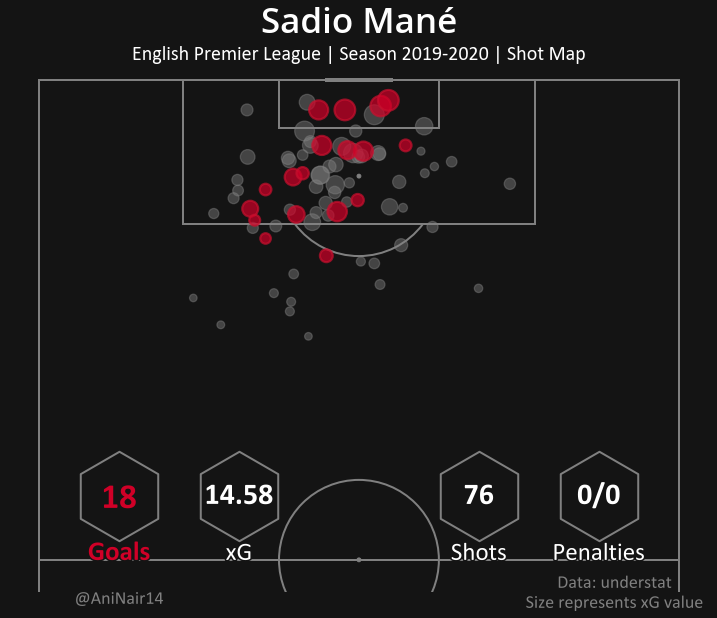

In [31]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

# pitch = Pitch(pitch_type='statsbomb', orientation='vertical', view = 'half',
#               pitch_color=bg, line_color='grey', figsize=(16, 10),
#               constrained_layout=False, tight_layout=True)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_xaxis()

size = np.sqrt(goals_2019['xG'])*500
size1 = np.sqrt(others_2019['xG'])*500

ax.scatter(goals_2019['X'], goals_2019['Y'], s=size, alpha=0.7, color='#D00027', edgecolor='#C8102E', zorder=4, lw=2.2)
ax.scatter(others_2019['X'], others_2019['Y'], s=size1, alpha=0.45, color='grey', edgecolor='grey', zorder=3, lw=1.25)

ax.scatter(70,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(55,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(25,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(10,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)

t1 = ax.text(70,66.5,'18',size=35, ha='center', color='#D00027',fontweight='bold', fontfamily=body_font, zorder=4)
t2 = ax.text(70,60,"Goals", size=27, ha='center', color='#D00027', fontweight='bold', fontfamily=body_font, zorder=4)

t3= ax.text(55,67,"14.58", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t4 = ax.text(55,60,"xG", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t5= ax.text(25,67,"76", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t6 = ax.text(25,60, "Shots", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t7 = ax.text(10,67, "0/0", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t8 = ax.text(10,60, "Penalties", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t = ax.text(40,126, "Sadio Mané", size=35, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t= ax.text(40,122.7, "English Premier League | Season 2019-2020 | Shot Map", size=20, ha='center', color='white',fontfamily=body_font, zorder=4)

t9 = ax.text(70,54.5, "@AniNair14", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t10 = ax.text(8,56.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t11 = ax.text(8,54, "Size represents xG value", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)


#Path Effects:
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t4.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t5.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t6.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t7.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t8.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t9.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t10.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t11.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

# plt.savefig("Mane_Shots_2019.jpg",facecolor=bg,bbox_inches="tight", dpi=700)

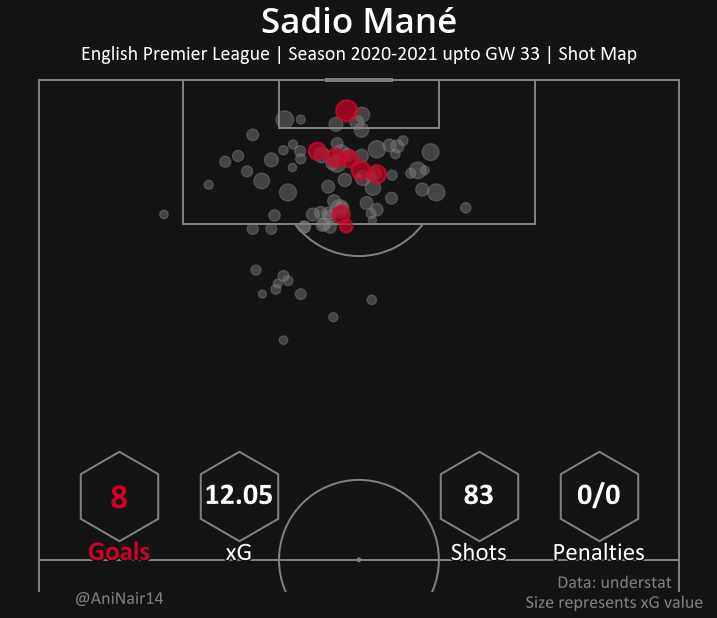

In [37]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

# pitch = Pitch(pitch_type='statsbomb', orientation='vertical', view = 'half',
#               pitch_color=bg, line_color='grey', figsize=(16, 10),
#               constrained_layout=False, tight_layout=True)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_xaxis()

size = np.sqrt(goals_2020['xG'])*500
size1 = np.sqrt(others_2020['xG'])*500

ax.scatter(goals_2020['X'], goals_2020['Y'], s=size, alpha=0.7, color='#D00027', edgecolor='#C8102E', zorder=4, lw=2.2)
ax.scatter(others_2020['X'], others_2020['Y'], s=size1, alpha=0.45, color='grey', edgecolor='grey', zorder=3, lw=1.25)

ax.scatter(70,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(55,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(25,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(10,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)

t1 = ax.text(70,66.5,'8',size=35, ha='center', color='#D00027',fontweight='bold', fontfamily=body_font, zorder=4)
t2 = ax.text(70,60,"Goals", size=27, ha='center', color='#D00027', fontweight='bold', fontfamily=body_font, zorder=4)

t3= ax.text(55,67,"12.05", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t4 = ax.text(55,60,"xG", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t5= ax.text(25,67,"83", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t6 = ax.text(25,60, "Shots", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t7 = ax.text(10,67, "0/0", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t8 = ax.text(10,60, "Penalties", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t = ax.text(40,126, "Sadio Mané", size=35, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t= ax.text(40,122.7, "English Premier League | Season 2020-2021 upto GW 33 | Shot Map", size=20, ha='center', color='white',fontfamily=body_font, zorder=4)

t9 = ax.text(70,54.5, "@AniNair14", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t10 = ax.text(8,56.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t11 = ax.text(8,54, "Size represents xG value", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)


#Path Effects:
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t4.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t5.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t6.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t7.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t8.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t9.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t10.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t11.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

# plt.savefig("Mane_Shots_2020.jpg",facecolor=bg,bbox_inches="tight", dpi=700)

# Creating Color Maps using LinearSegmentedColormap

In [38]:
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)

pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)

pearl_earring_cmap_1001 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#5A0004', '#FF0000'], N=100)

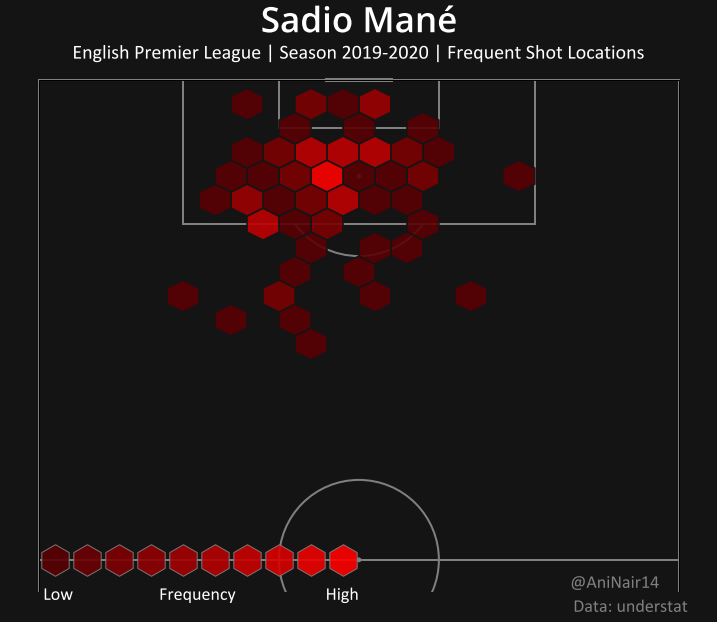

In [39]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

hexmap = pitch.hexbin(shots_2019.Y, shots_2019.X, ax=ax, edgecolor=bg, gridsize=(20, 20),
                      cmap=pearl_earring_cmap_1001, zorder=4, alpha=0.9, lw=1.75)

plt.gca().invert_xaxis()

ax.scatter(78,60, marker='h', s=1000, color='#5A0004', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(74,60, marker='h', s=1000, color='#6C0004', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(70,60, marker='h', s=1000, color='#7F0003', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(66,60, marker='h', s=1000, color='#910003', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(62,60, marker='h', s=1000, color='#A30002', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(58,60, marker='h', s=1000, color='#B60002', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(54,60, marker='h', s=1000, color='#C80001', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(50,60, marker='h', s=1000, color='#DA0001', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(46,60, marker='h', s=1000, color='#ED0000', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(42,60, marker='h', s=1000, color='#FF0000', edgecolor='grey', lw=1, zorder=4, alpha=0.9)


#Text:
t = ax.text(79.5,55, "Low", size=18, ha='left', color='white', fontfamily=body_font, zorder=4)
t1 = ax.text(65,55, "Frequency", size=18, ha='left', color='white', fontfamily=body_font, zorder=4)
t2 = ax.text(40,55, "High", size=18, ha='right', color='white', fontfamily=body_font, zorder=4)

t3 = ax.text(40,126, "Sadio Mané", size=35, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t4= ax.text(40,122.7, "English Premier League | Season 2019-2020 | Frequent Shot Locations", size=20, ha='center', color='white',fontfamily=body_font, zorder=4)

t5 = ax.text(8,56.5, "@AniNair14", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t6 = ax.text(6,53.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)

#Path effects:
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t4.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t5.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t6.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

# plt.savefig("Mane_Shots_Freq_2019.jpg",facecolor=bg,bbox_inches="tight", dpi=700)

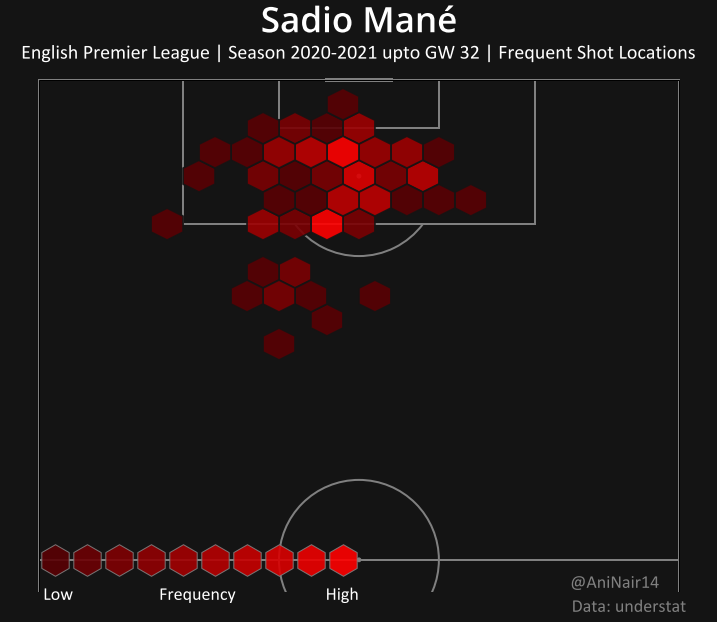

In [40]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

hexmap = pitch.hexbin(shots_2020.Y, shots_2020.X, ax=ax, edgecolor=bg, gridsize=(20, 20),
                      cmap=pearl_earring_cmap_1001, zorder=4, alpha=0.9, lw=1.75)

plt.gca().invert_xaxis()

ax.scatter(78,60, marker='h', s=1000, color='#5A0004', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(74,60, marker='h', s=1000, color='#6C0004', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(70,60, marker='h', s=1000, color='#7F0003', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(66,60, marker='h', s=1000, color='#910003', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(62,60, marker='h', s=1000, color='#A30002', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(58,60, marker='h', s=1000, color='#B60002', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(54,60, marker='h', s=1000, color='#C80001', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(50,60, marker='h', s=1000, color='#DA0001', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(46,60, marker='h', s=1000, color='#ED0000', edgecolor='grey', lw=1, zorder=4, alpha=0.9)
ax.scatter(42,60, marker='h', s=1000, color='#FF0000', edgecolor='grey', lw=1, zorder=4, alpha=0.9)


#Text:
t = ax.text(79.5,55, "Low", size=18, ha='left', color='white', fontfamily=body_font, zorder=4)
t1 = ax.text(65,55, "Frequency", size=18, ha='left', color='white', fontfamily=body_font, zorder=4)
t2 = ax.text(40,55, "High", size=18, ha='right', color='white', fontfamily=body_font, zorder=4)

t3 = ax.text(40,126, "Sadio Mané", size=35, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t4= ax.text(40,122.7, "English Premier League | Season 2020-2021 upto GW 32 | Frequent Shot Locations", size=20, ha='center', color='white',fontfamily=body_font, zorder=4)

t5 = ax.text(8,56.5, "@AniNair14", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t6 = ax.text(6.2,53.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)

#Path effects:
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t4.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t5.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
t6.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

# plt.savefig("Mane_Shots_Freq_2020.jpg",facecolor=bg,bbox_inches="tight", dpi=700)